## Machine Learning Model Building Pipeline: Data Analysis

Following are the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the dataset "data.csv"

===================================================================================================

## Predicting lead scoring

The aim of the project is to build a machine learning model in which a score is given to each of the leads such that prospects with a higher score have a bigger chance of conversion and vice versa.


### Why is this important? 

Predicting scores of conversion is useful to identify fruitful investments (in terms of time spent and effort) for the sales force.


### What is the objective of the machine learning model?

We aim to minimise the difference between the real conversion status and the conversion estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

====================================================================================================

## Prospect dataset: Data Analysis

In the following cells, we will analyse the variables of the prospect Dataset from data.csv. 

In [14]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_theme()

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [27]:
# load dataset
data = pd.read_csv('train/data.csv', sep=';')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(9193, 35)


,ID_CLIENT,ORIGINE_LEAD,SOURCE_LEAD,NIVEAU_LEAD,QUALITE_LEAD,CONTACT_PAR_MAIL,CONTACT_PAR_TELEPHONE,STATUT_ACTUEL,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,PAYS,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,SCORE_ACTIVITE,SCORE_PROFIL,ANNONCE_VUE,MAGAZINE,ARTICLE_JOURNAL,FORUM,JOURNAUX,PUB_DIGITALE,RECOMMANDATION,Comment avez-vous entendu parler de nous ?,Souhaites-tu recevoir plus d'infos sur notre cours ?,Souhaites-tu recevoir des mises à jour sur nos programmes ?,Souhaites-tu recevoir des mises à jour par message privé ?,Souhaites-tu payer par chèque ?,Souhaites-tu recevoir une copie de notre livre blanc ?
0,628707,Formulaire Lead Add,Olark Chat,Select,NaN,Non,Non,Sans emploi,0,0.0,0,0.0,Email ouvert,Email ouvert,NaN,Select,Marketing Management,NaN,NaN,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
1,650444,Soumission landing page,Organic Search,Autre leads,Pas du tout pertinent,Non,Non,Sans emploi,0,3.0,519,3.0,Page visitée sur le site,Modifié,India,Autres villes de Maharashtra,"Banking, Investment And Insurance",Ne pas suivre de formation continue,Moyen,Elevé,15.0,17.0,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Oui
2,631159,Soumission landing page,Google,NaN,NaN,Non,Non,NaN,0,3.0,323,3.0,Email ouvert,Email ouvert,India,Mumbai,Hospitality Management,NaN,NaN,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,NaN,Non,Non,Non,Non,Non
3,637163,Formulaire Lead Add,Reference,Lead potentiel,Pourrait être pertinent,Non,Non,Sans emploi,1,0.0,0,0.0,Email ouvert,Email ouvert,NaN,Select,"Banking, Investment And Insurance",Reviendra après avoir lu le courriel,Moyen,Elevé,15.0,19.0,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
4,644599,Soumission landing page,Direct Traffic,NaN,NaN,Non,Non,NaN,0,3.0,258,3.0,Email ouvert,Email ouvert,India,Autres villes,Finance Management,NaN,Moyen,Moyen,14.0,16.0,Non,Non,Non,Non,Non,Non,Non,Etudiant d'une certaine école,Non,Non,Non,Non,Non


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 35 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID_CLIENT                                                    9193 non-null   int64  
 1   ORIGINE_LEAD                                                 9193 non-null   object 
 2   SOURCE_LEAD                                                  9157 non-null   object 
 3   NIVEAU_LEAD                                                  6496 non-null   object 
 4   QUALITE_LEAD                                                 4445 non-null   object 
 5   CONTACT_PAR_MAIL                                             9193 non-null   object 
 6   CONTACT_PAR_TELEPHONE                                        9193 non-null   object 
 7   STATUT_ACTUEL                                                6515 non-null   o

In [88]:
data.describe()

,ID_CLIENT,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
count,9193.000000,9193.000000,9056.000000,9193.000000,9056.000000,4988.000000,4988.000000
mean,617182.181660,0.385402,3.446555,487.978462,2.362872,14.306937,16.344226
std,23396.400057,0.486717,4.861053,548.226149,2.161216,1.383616,1.809338
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596493.000000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615488.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637361.000000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


The prospect dataset contains 9193 rows, i.e., prospects, and 35 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: Lead scoring

### Missing values

which variables of the dataset contain missing values.

In [6]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values
round(data[vars_with_na].isnull().mean()*100, 2).astype(str) + '%'

SOURCE_LEAD                                    0.39%
NIVEAU_LEAD                                   29.34%
QUALITE_LEAD                                  51.65%
STATUT_ACTUEL                                 29.13%
NB_VISITES                                     1.49%
NB_PAGES_VUES_PAR_VISITE                       1.49%
DERNIERE_ACTIVITE                              1.12%
PAYS                                          26.61%
VILLE                                         15.39%
SPECIALISATION                                 15.6%
TAGS                                          36.32%
INDEX_ACTIVITE                                45.74%
INDEX_PROFIL                                  45.74%
SCORE_ACTIVITE                                45.74%
SCORE_PROFIL                                  45.74%
Comment avez-vous entendu parler de nous ?     23.9%
dtype: object

Our dataset contains a few variables with missing values. We need to account for this in our following data processing, where we will engineer the variables for use in Machine Learning Models.

### Numerical variables

Numerical variables we have in the dataset

In [7]:
# make list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  7


,ID_CLIENT,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
0,628707,0,0.0,0,0.0,NaN,NaN
1,650444,0,3.0,519,3.0,15.0,17.0
2,631159,0,3.0,323,3.0,NaN,NaN
3,637163,1,0.0,0,0.0,15.0,19.0
4,644599,0,3.0,258,3.0,14.0,16.0


From the above view of the dataset, we notice the variable ID_CLIENT, which is an indicator of the prospect. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each prospect in the dataset. See below:

In [10]:
print('Number of prospect Id labels: ', len(data['ID_CLIENT'].unique()))
print('Number of prospect in the Dataset: ', len(data))

Number of prospect Id labels:  9193
Number of prospect in the Dataset:  9193


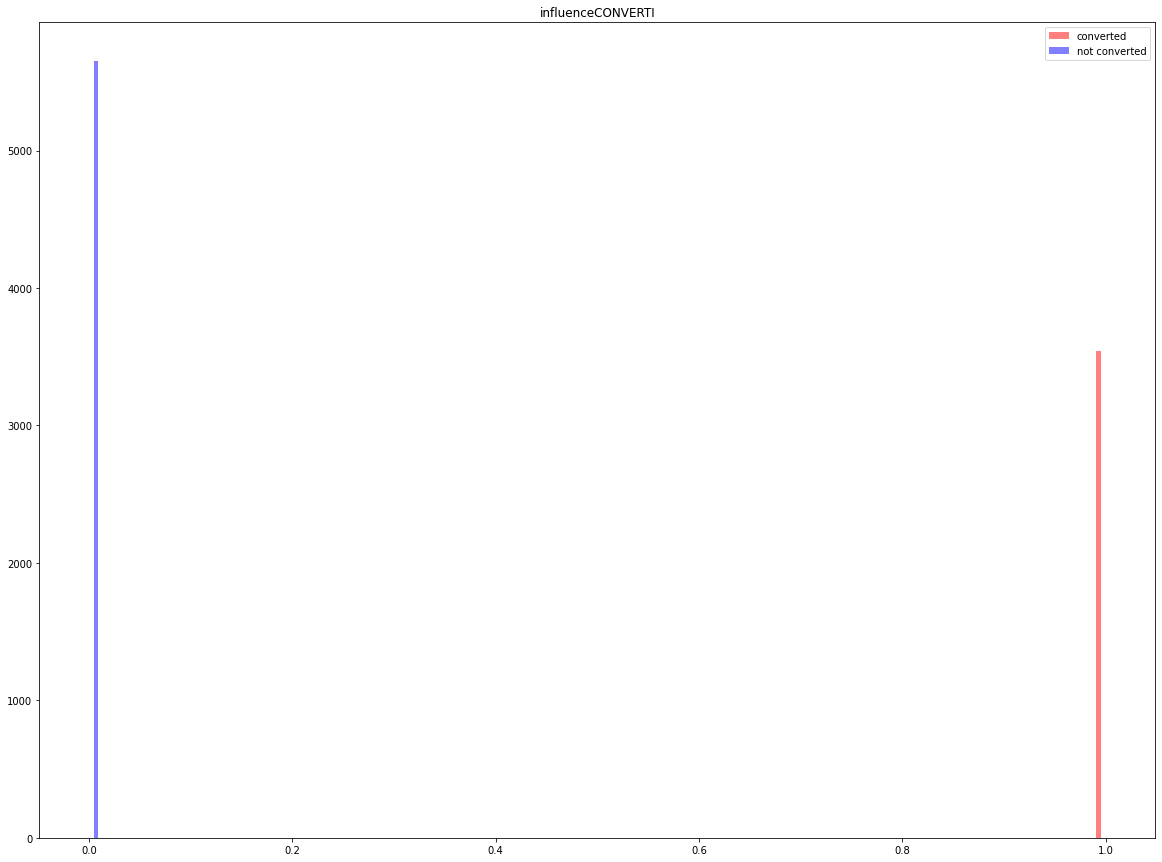

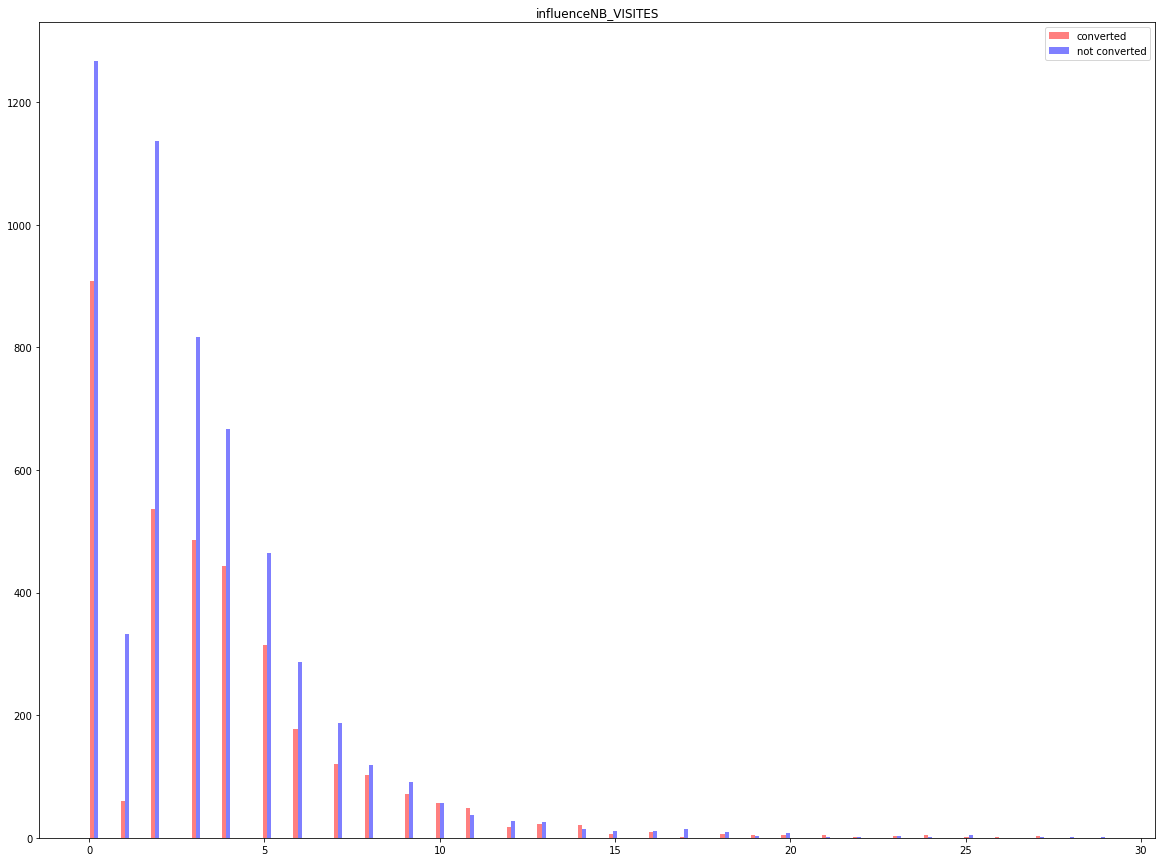

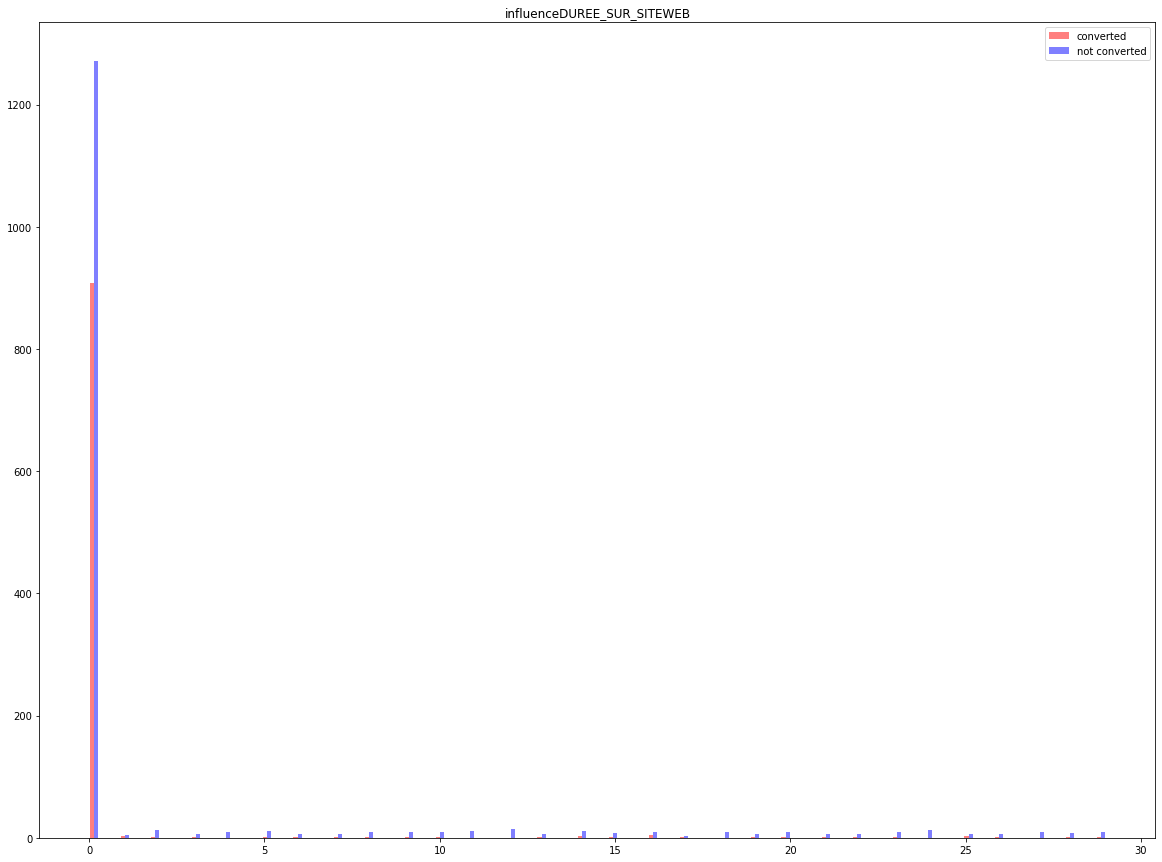

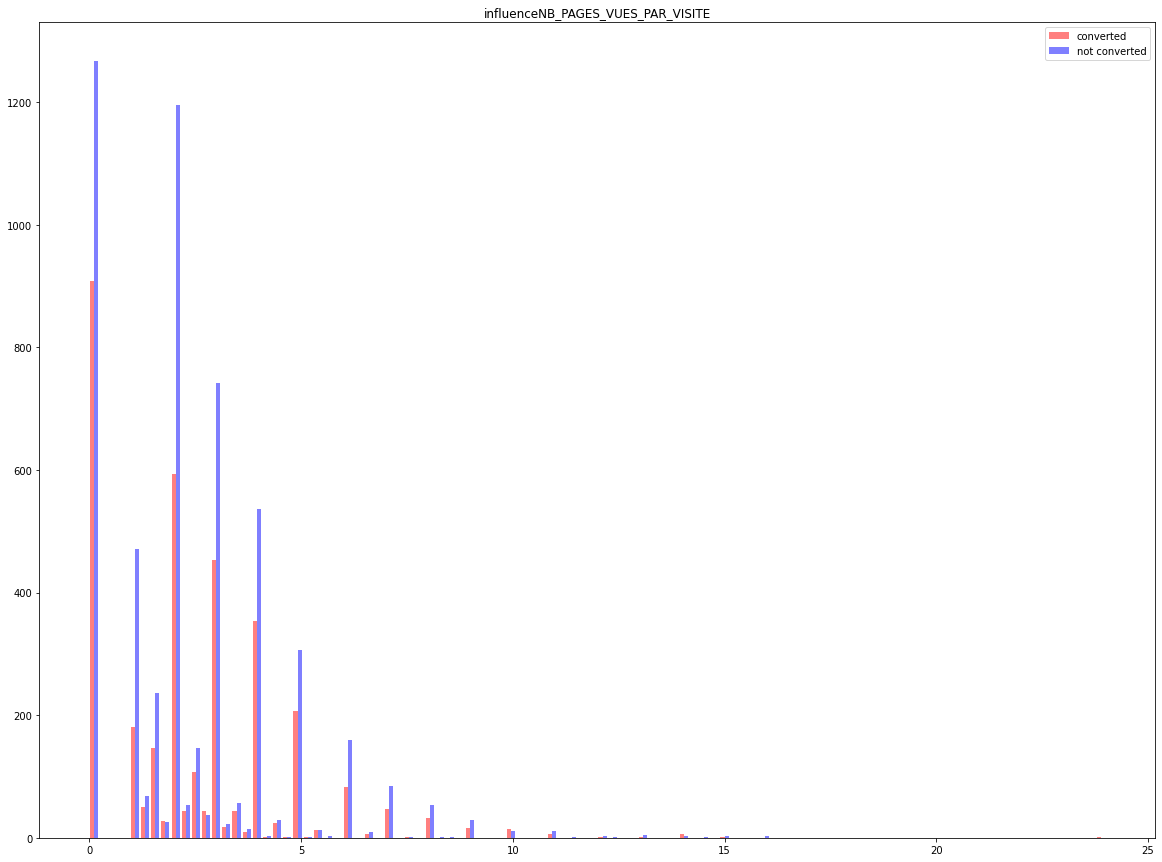

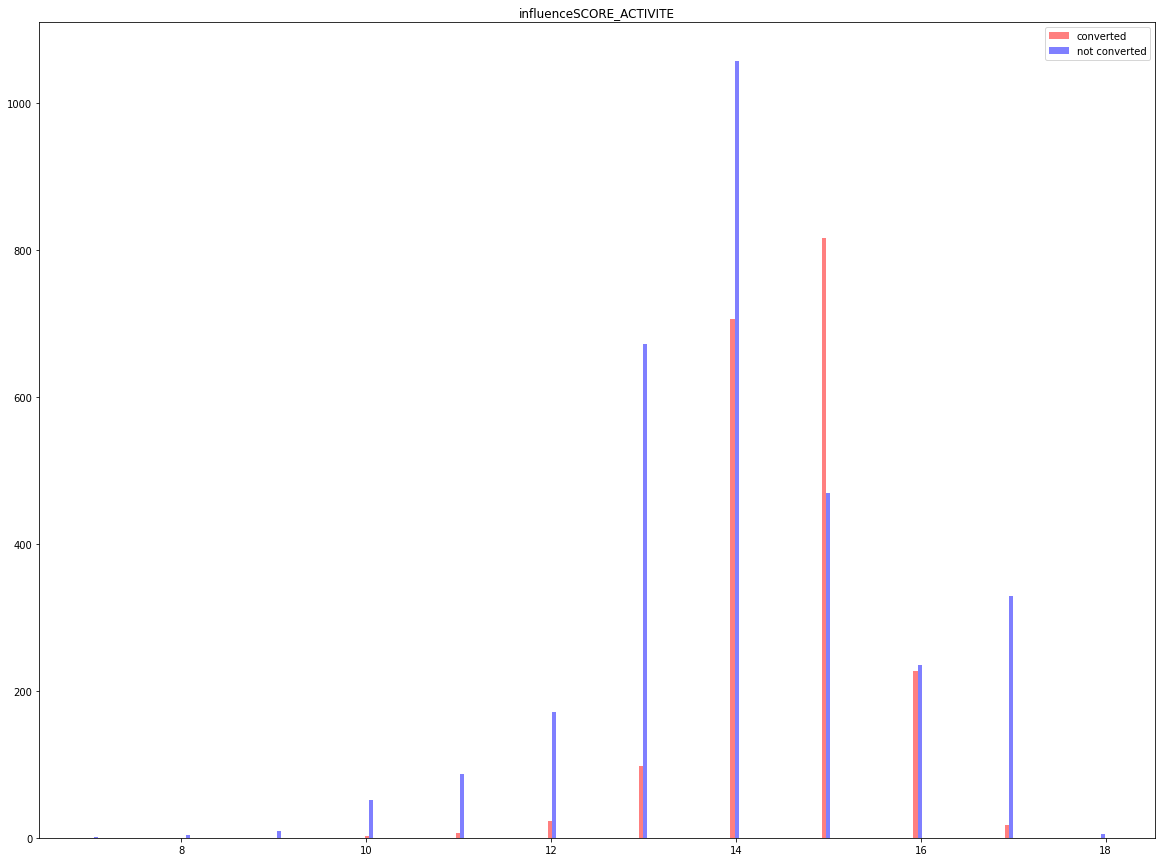

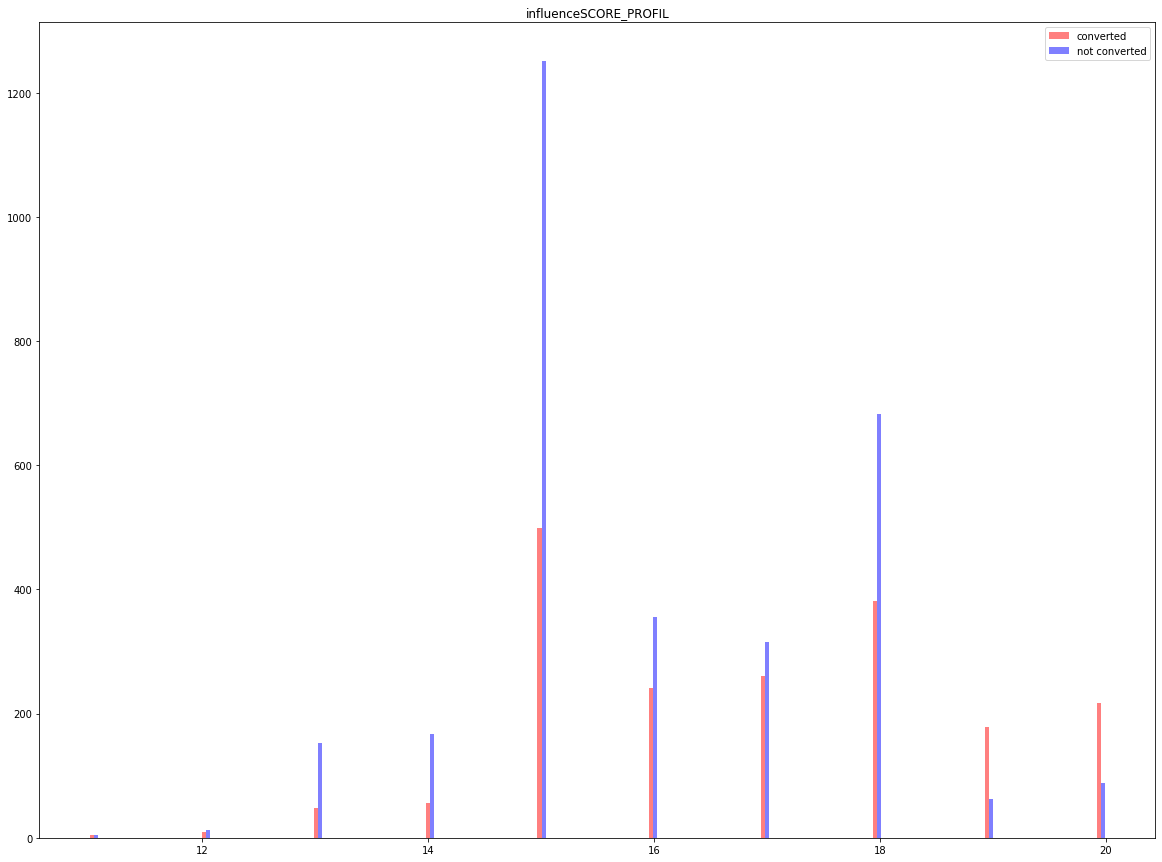

In [90]:
def _plot(col, title=''):
    is_converted = data['CONVERTI'] == 1
    is_not_converted = data['CONVERTI'] == 0
    not_outliers = data[col] < 30

    converted = data[ not_outliers & is_converted ][col]
    not_converted = data[is_not_converted & not_outliers ][col]

    plt.figure(figsize=(20,15))
    plt.hist((converted, not_converted), bins=100, alpha=0.5, label=['converted', 'not converted'], color=['r', 'b'])
    plt.legend(loc='upper right')
    plt.title(title)

for col in num_vars[1:] :
    _plot(col, title="influence "+col)

#### Temporal variables

We have no temporal variables in this dataset.

#### Discrete variables

Analysis of discrete variables, i.e., show a finite number of values

In [8]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in ['CONVERTI']]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  2


In [62]:
# let's visualise the discrete variables

data[discrete_vars].head()

,SCORE_ACTIVITE,SCORE_PROFIL
0,NaN,NaN
1,15.0,17.0
2,NaN,NaN
3,15.0,19.0
4,14.0,16.0


These discrete variables tend to be qualifications or grading scales, they refer to the score given to the prospect by the sales people.

Let's go ahead and analyse their contribution to the conversion.

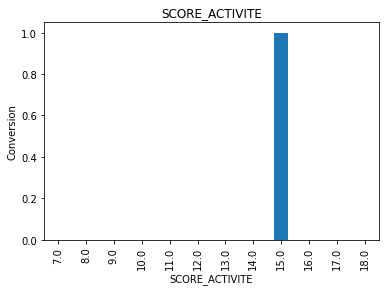

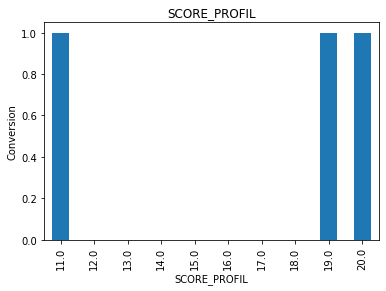

In [31]:
def analyse_discrete(df, var):
    df = df.copy()
    df.groupby(var)['CONVERTI'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Conversion')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete variables in our dataset.

In [9]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+['CONVERTI', 'ID_CLIENT']]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  3


In [10]:
# let's visualise the continuous variables

data[cont_vars].head()

,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE
0,0.0,0,0.0
1,3.0,519,3.0
2,3.0,323,3.0
3,0.0,0,0.0
4,3.0,258,3.0


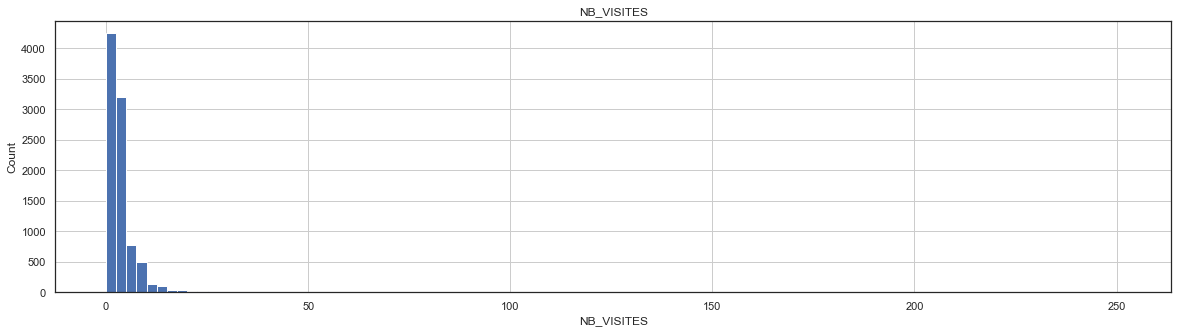

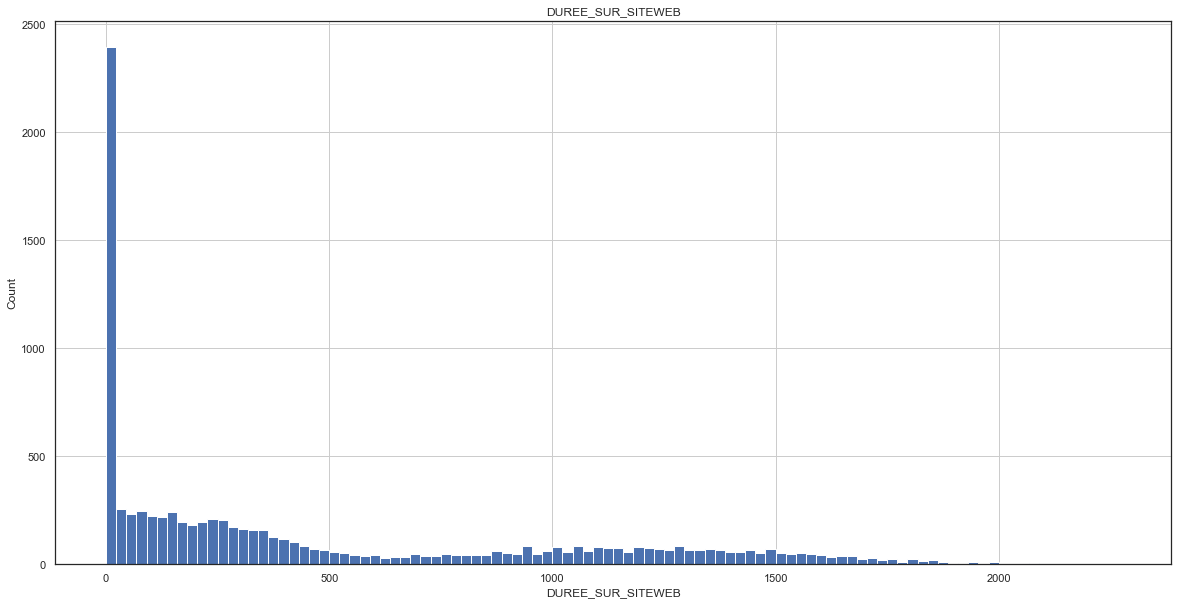

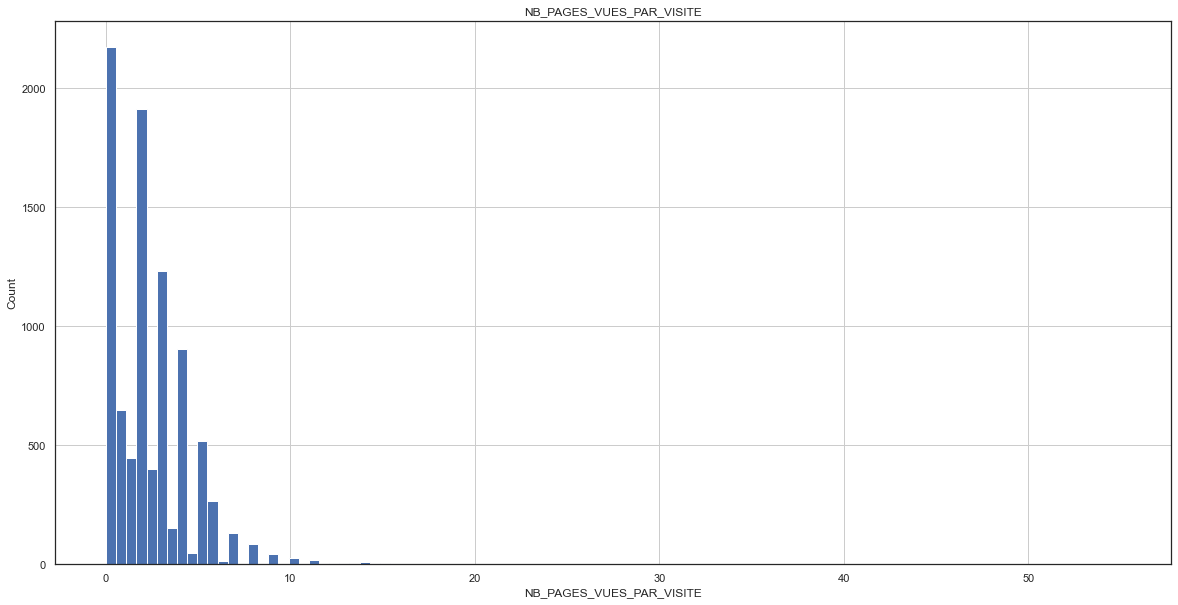

In [72]:
# Let's go ahead and analyse the distributions of these variables


def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=100)
    plt.ylabel('Count')
    plt.xlabel(var)
    plt.title(var)
    plt.rcParams["figure.figsize"] = (20,10)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

The variables are not normally distributed. 

To maximise performance of linear models, we need to account for non-Gaussian distributions. We will transform our variables.

Let's evaluate if a logarithmic transformation of the variables returns values that follow a normal distribution:

[Text(0.5, 0, 'NB_VISITES'),
 Text(1.5, 0, 'DUREE_SUR_SITEWEB'),
 Text(2.5, 0, 'NB_PAGES_VUES_PAR_VISITE')]

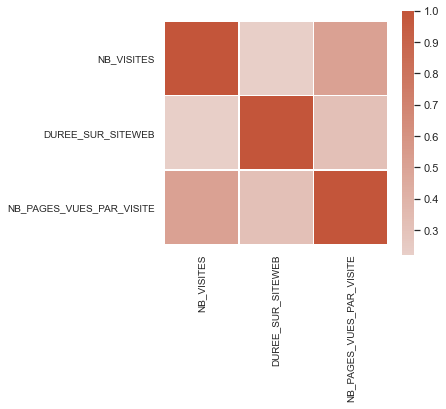

In [47]:
sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = data[cont_vars]

# Compute the correlation matrix
corr = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
g.set_xticklabels(g.get_yticklabels(), rotation = 90, fontsize = 10)

In [13]:
data[cont_vars]

,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE
0,0.0,0,0.00
1,3.0,519,3.00
2,3.0,323,3.00
3,0.0,0,0.00
4,3.0,258,3.00
...,...,...,...
9188,0.0,0,0.00
9189,20.0,155,4.00
9190,5.0,674,2.50
9191,5.0,1341,2.50


In [44]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation


def analyse_transformed_continuous(df, var):
    df = df.copy()

    # log does not take 0 or negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.ylabel('Number of houses')
        plt.xlabel(var)
        plt.title(var)
        plt.show()
        print('test')


for var in cont_vars:
    print(var)
    analyse_transformed_continuous(data, var)

NB_VISITES
DUREE_SUR_SITEWEB
NB_PAGES_VUES_PAR_VISITE


We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

In [48]:
# let's explore the relationship between the house price and
# the transformed variables with more detail:


def transform_analyse_continuous(df, var):
    df = df.copy()

    # log does not take negative values, so let's be careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        # log transform the variable
        df[var] = np.log(df[var])
        
        # log transform the target (remember it was also skewed)
        df['SalePrice'] = np.log(df['CONVERTI'])
        
        # plot
        plt.scatter(df[var], df['CONVERTI'])
        plt.ylabel('CONVERTI')
        plt.xlabel(var)
        plt.show()


for var in cont_vars:
    if var != 'CONVERTI':
        transform_analyse_continuous(data, var)

#### Outliers

Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables.

In [46]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    df = df.copy()

    # log does not take negative values, so let's be
    # careful and skip those variables
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()


for var in cont_vars:
    find_outliers(data, var)

### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [63]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  28


In [64]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,ORIGINE_LEAD,SOURCE_LEAD,NIVEAU_LEAD,QUALITE_LEAD,CONTACT_PAR_MAIL,CONTACT_PAR_TELEPHONE,STATUT_ACTUEL,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,PAYS,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,ANNONCE_VUE,MAGAZINE,ARTICLE_JOURNAL,FORUM,JOURNAUX,PUB_DIGITALE,RECOMMANDATION,Comment avez-vous entendu parler de nous ?,Souhaites-tu recevoir plus d'infos sur notre cours ?,Souhaites-tu recevoir des mises à jour sur nos programmes ?,Souhaites-tu recevoir des mises à jour par message privé ?,Souhaites-tu payer par chèque ?,Souhaites-tu recevoir une copie de notre livre blanc ?
0,Formulaire Lead Add,Olark Chat,Select,NaN,Non,Non,Sans emploi,Email ouvert,Email ouvert,NaN,Select,Marketing Management,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
1,Soumission landing page,Organic Search,Autre leads,Pas du tout pertinent,Non,Non,Sans emploi,Page visitée sur le site,Modifié,India,Autres villes de Maharashtra,"Banking, Investment And Insurance",Ne pas suivre de formation continue,Moyen,Elevé,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Oui
2,Soumission landing page,Google,NaN,NaN,Non,Non,NaN,Email ouvert,Email ouvert,India,Mumbai,Hospitality Management,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,NaN,Non,Non,Non,Non,Non
3,Formulaire Lead Add,Reference,Lead potentiel,Pourrait être pertinent,Non,Non,Sans emploi,Email ouvert,Email ouvert,NaN,Select,"Banking, Investment And Insurance",Reviendra après avoir lu le courriel,Moyen,Elevé,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
4,Soumission landing page,Direct Traffic,NaN,NaN,Non,Non,NaN,Email ouvert,Email ouvert,India,Autres villes,Finance Management,NaN,Moyen,Moyen,Non,Non,Non,Non,Non,Non,Non,Etudiant d'une certaine école,Non,Non,Non,Non,Non


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [65]:
data[cat_vars].nunique()

ORIGINE_LEAD                                                    5
SOURCE_LEAD                                                    21
NIVEAU_LEAD                                                     6
QUALITE_LEAD                                                    5
CONTACT_PAR_MAIL                                                2
CONTACT_PAR_TELEPHONE                                           2
STATUT_ACTUEL                                                   6
DERNIERE_ACTIVITE                                              17
DERNIERE_ACTIVITE_NOTABLE                                      16
PAYS                                                           38
VILLE                                                           7
SPECIALISATION                                                 19
TAGS                                                           25
INDEX_ACTIVITE                                                  3
INDEX_PROFIL                                                    3
ANNONCE_VU

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

#### Rare labels:

Investigate if there are labels that are present only in a small number of prospects:

In [66]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['CONVERTI'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

ORIGINE_LEAD
Formulaire Quick Add    0.000109
Importation de lead     0.005983
Name: CONVERTI, dtype: float64

SOURCE_LEAD
Click2call           0.000435
Facebook             0.005983
Live Chat            0.000218
NC_EDM               0.000109
Pay per Click Ads    0.000109
Press_Release        0.000218
Social Media         0.000218
WeLearn              0.000109
bing                 0.000653
blog                 0.000109
google               0.000544
testone              0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
Name: CONVERTI, dtype: float64

NIVEAU_LEAD
Etudiant                             0.002611
Etudiant en double spécialisation    0.002176
Name: CONVERTI, dtype: float64

Series([], Name: CONVERTI, dtype: float64)

Series([], Name: CONVERTI, dtype: float64)

CONTACT_PAR_TELEPHONE
Oui    0.000218
Name: CONVERTI, dtype: float64

STATUT_ACTUEL
Autre              0.001740
Femme au foyer     0.001088
Homme d'affaire    0.000870
Name: CONVERTI, dtype: float64

D

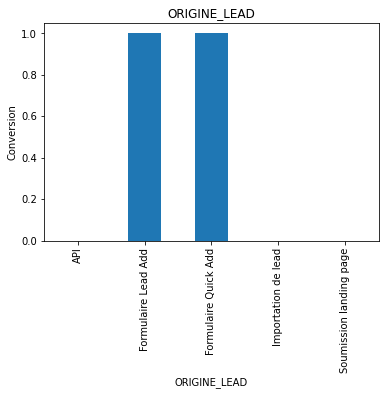

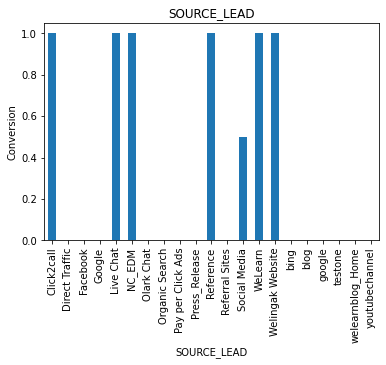

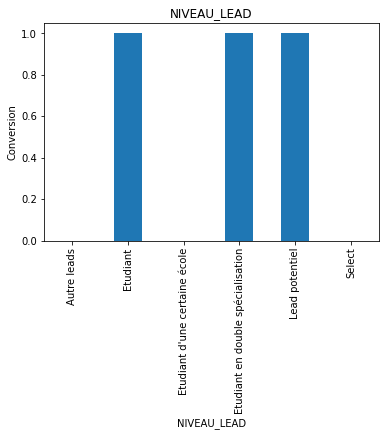

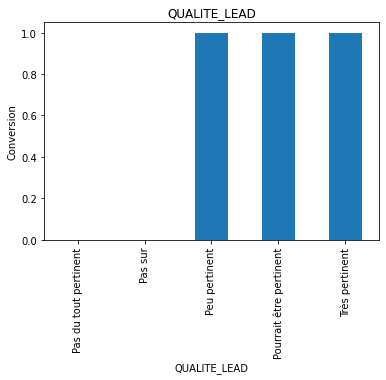

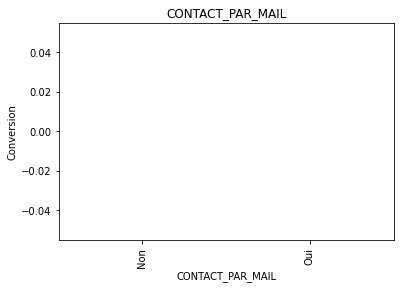

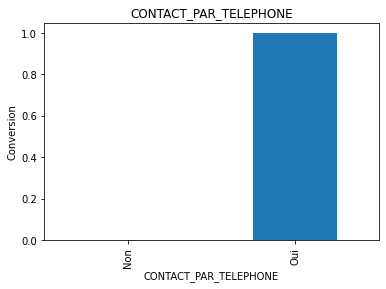

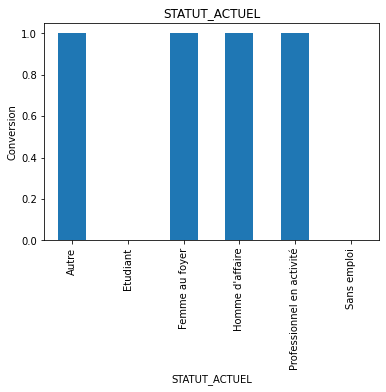

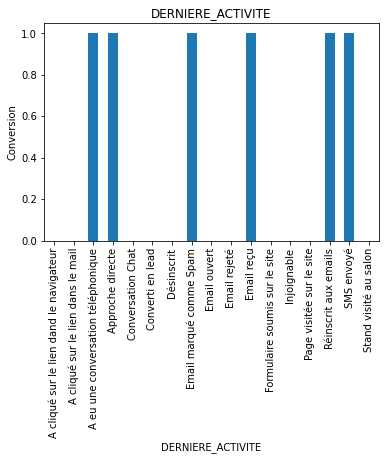

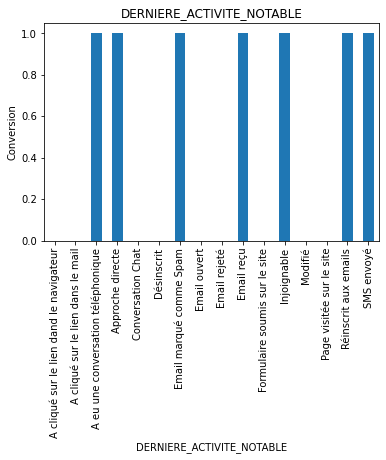

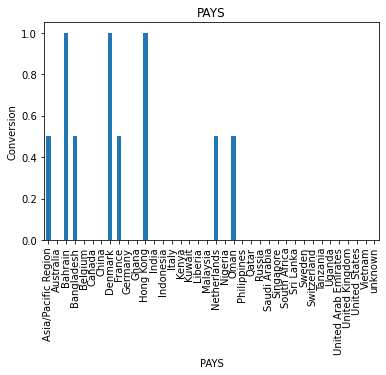

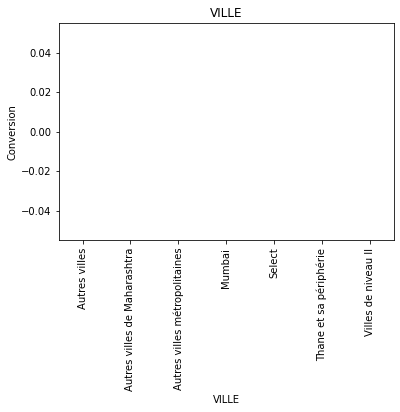

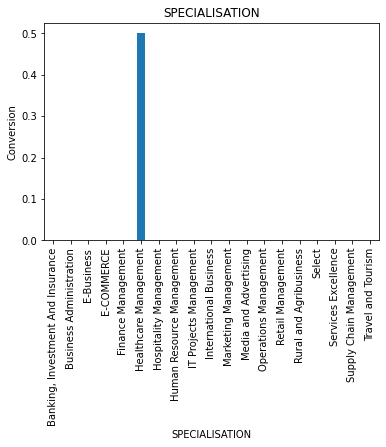

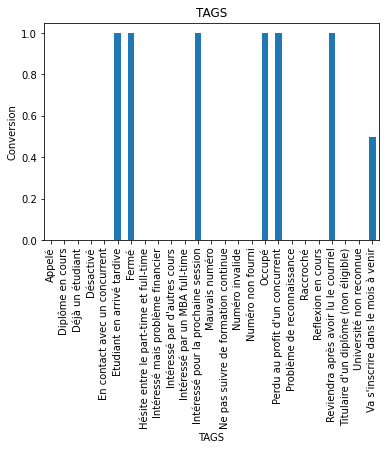

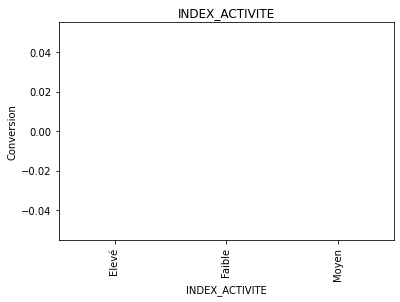

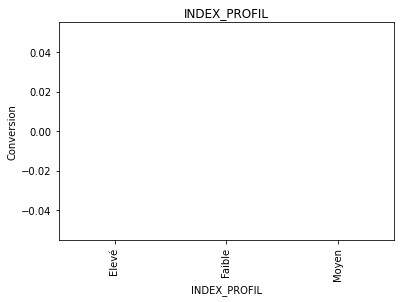

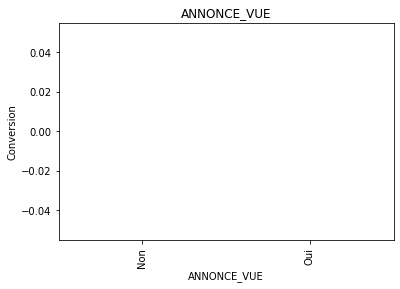

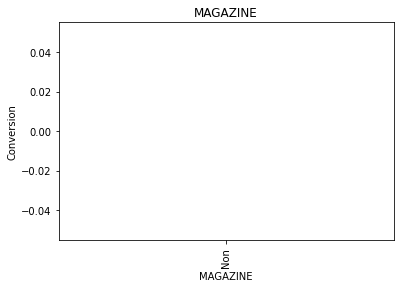

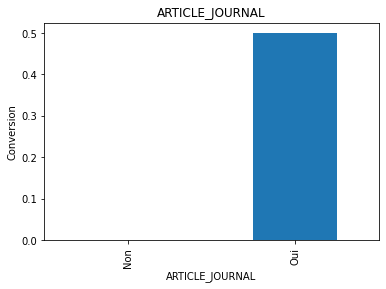

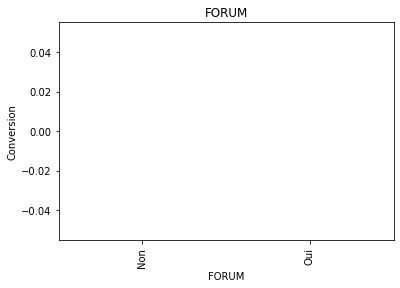

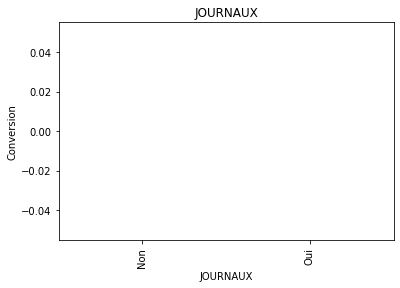

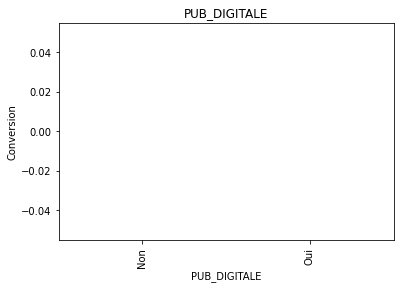

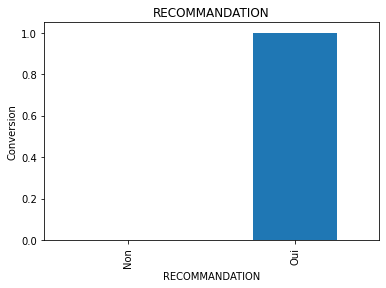

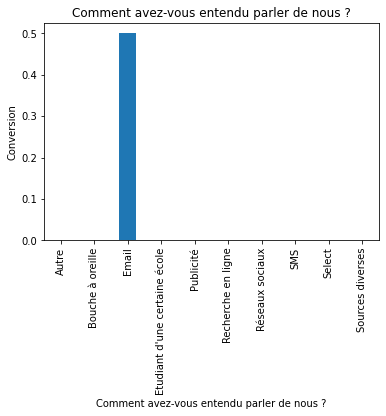

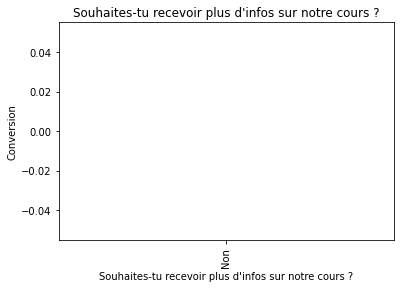

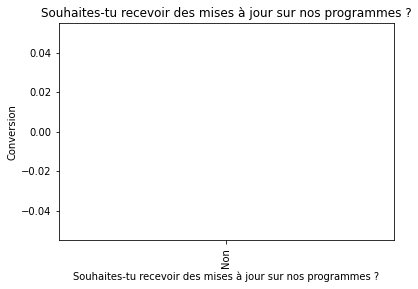

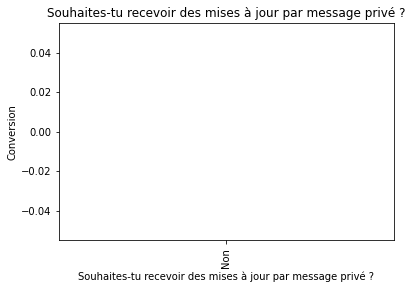

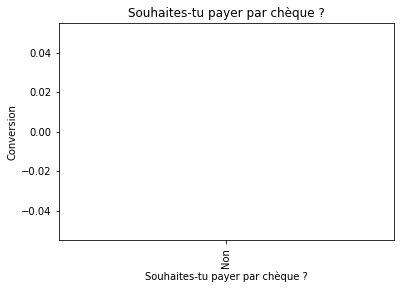

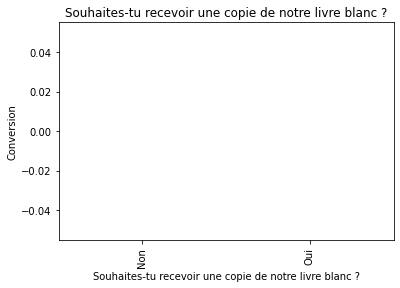

In [67]:
for var in cat_vars:
    # we can re-use the function to determine median
    # sale price, that we created for discrete variables

    analyse_discrete(data, var)

In [56]:
def _plot(col='', title='') :
    temp = data[[col, 'CONVERTI']].groupby(col).count()['CONVERTI']
    labels = temp.index
    x = np.arange(len(labels)) 
    total = temp.values
    converted = data[[col, 'CONVERTI']].groupby(col).sum()['CONVERTI'].values
    not_converted = total - converted

    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, converted, width, label='converted')
    rects2 = ax.bar(x + width/2, not_converted, width, label='not_converted')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conversion')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90, ha='right')
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    #fig.tight_layout()
    plt.figure(figsize=(50,50))

    plt.show()

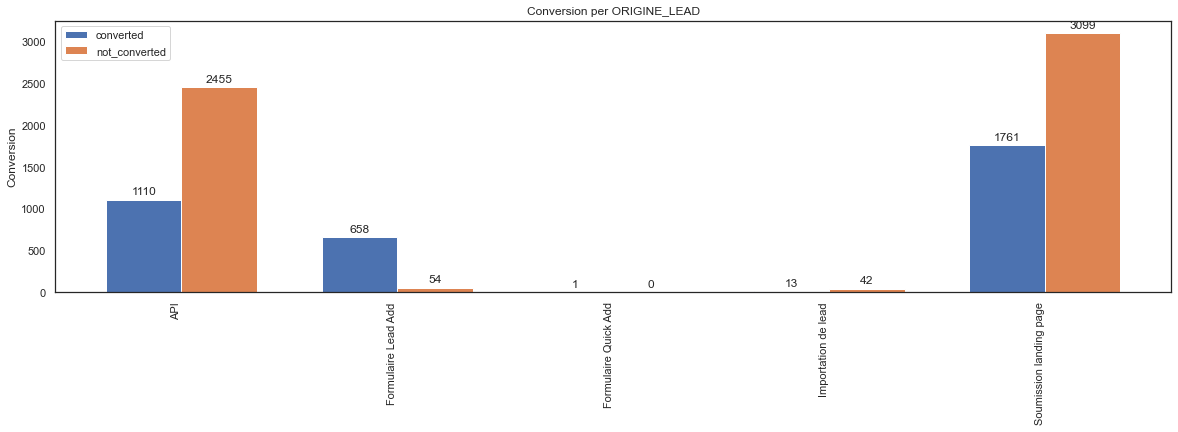

<Figure size 3600x3600 with 0 Axes>

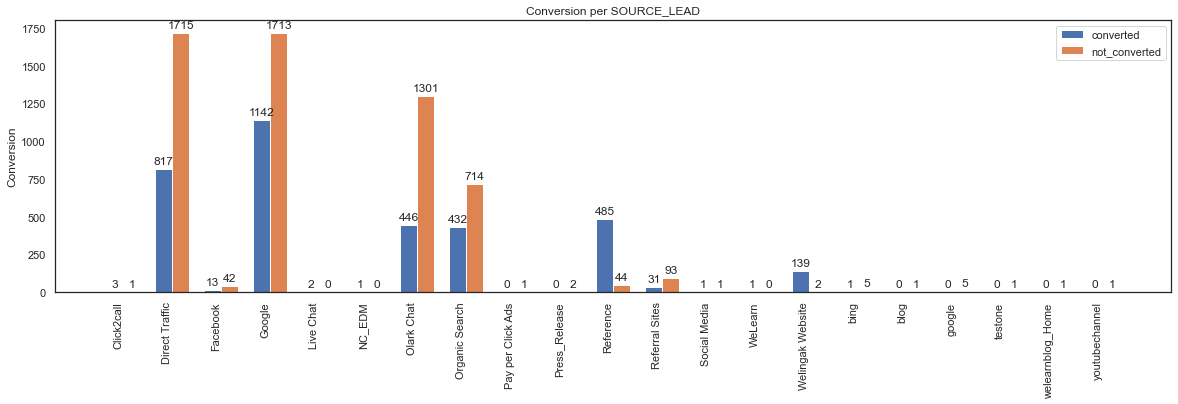

<Figure size 3600x3600 with 0 Axes>

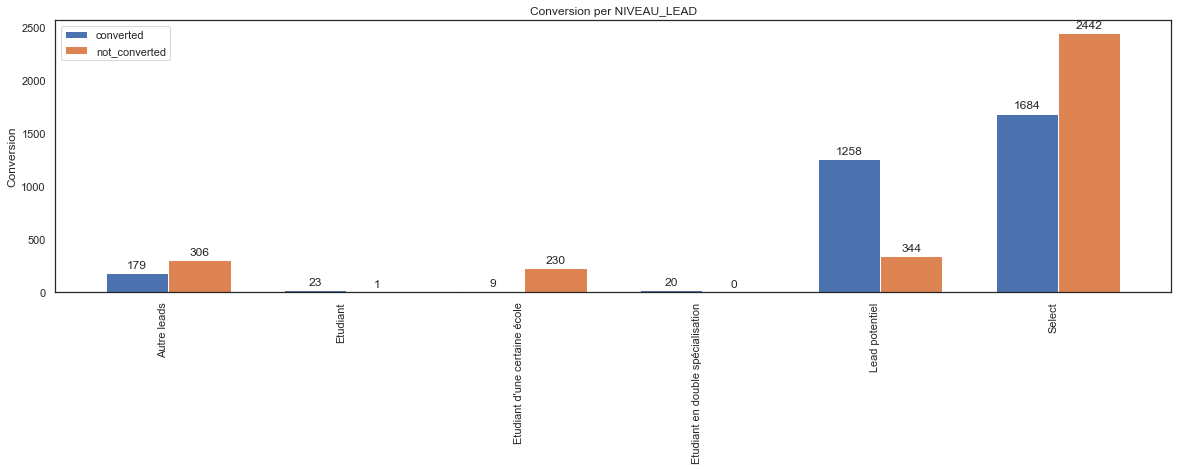

<Figure size 3600x3600 with 0 Axes>

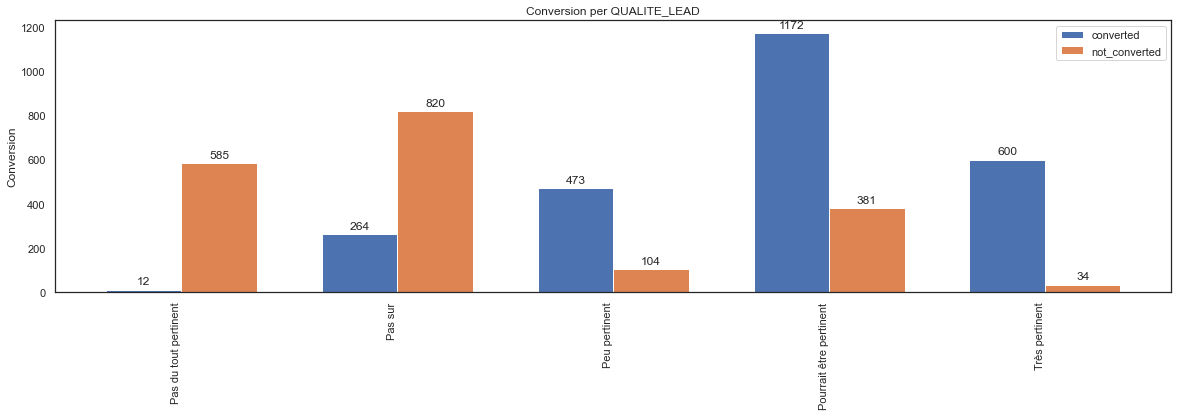

<Figure size 3600x3600 with 0 Axes>

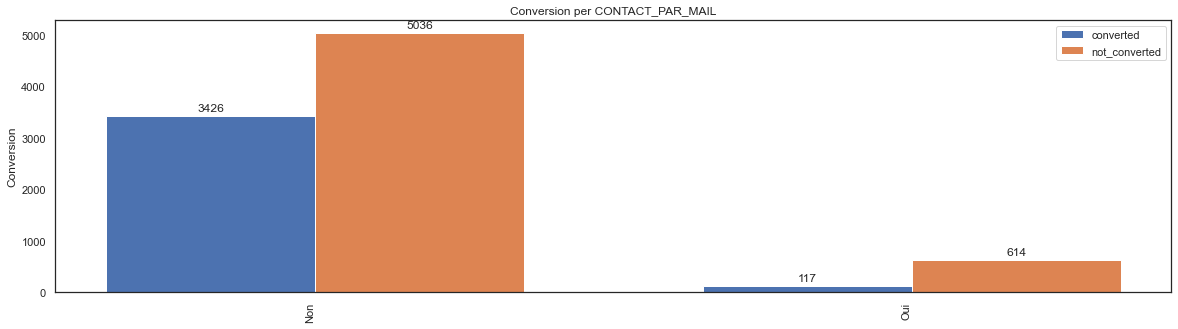

<Figure size 3600x3600 with 0 Axes>

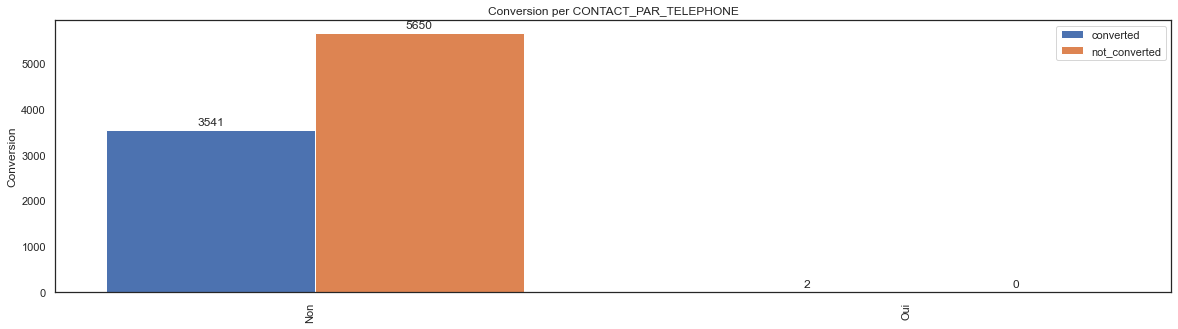

<Figure size 3600x3600 with 0 Axes>

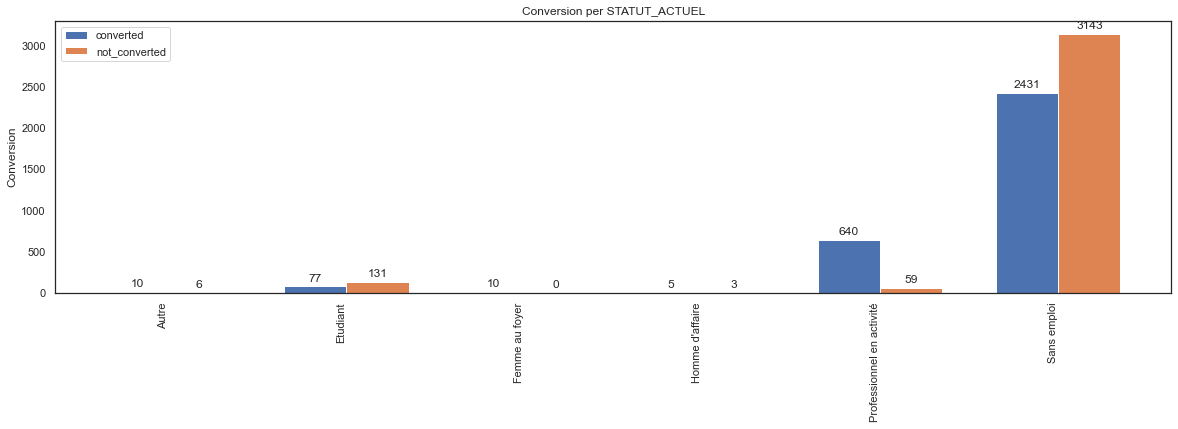

<Figure size 3600x3600 with 0 Axes>

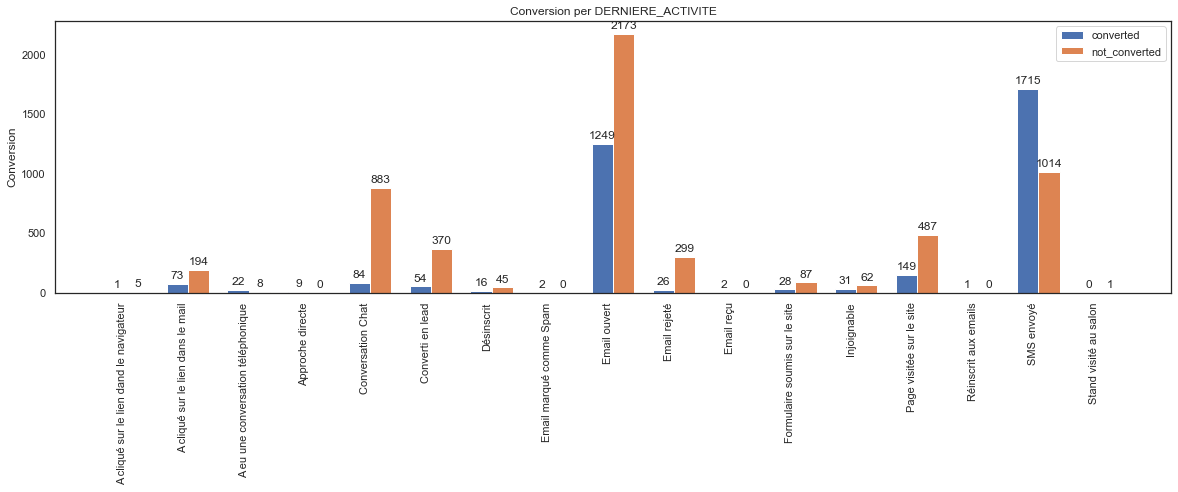

<Figure size 3600x3600 with 0 Axes>

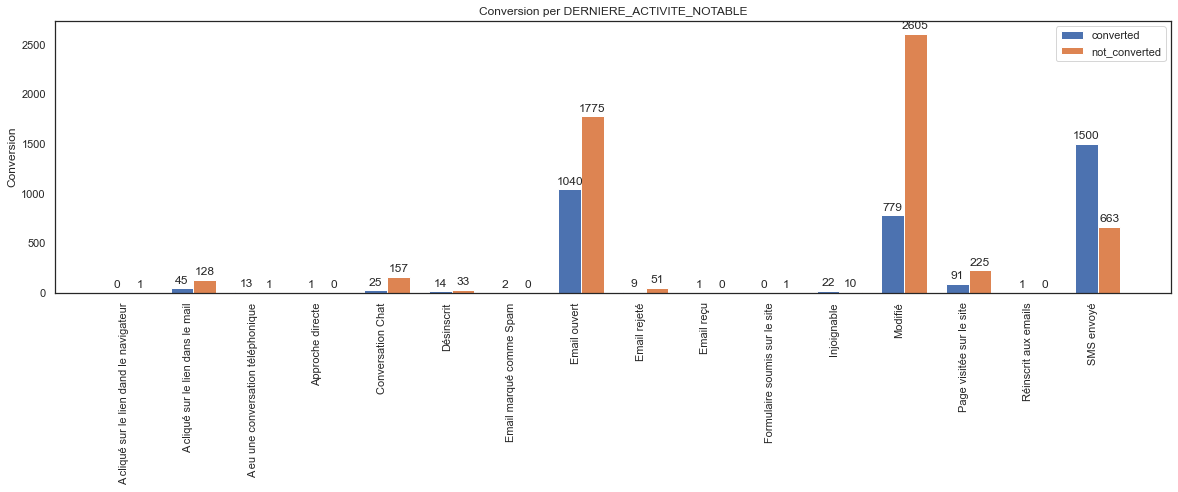

<Figure size 3600x3600 with 0 Axes>

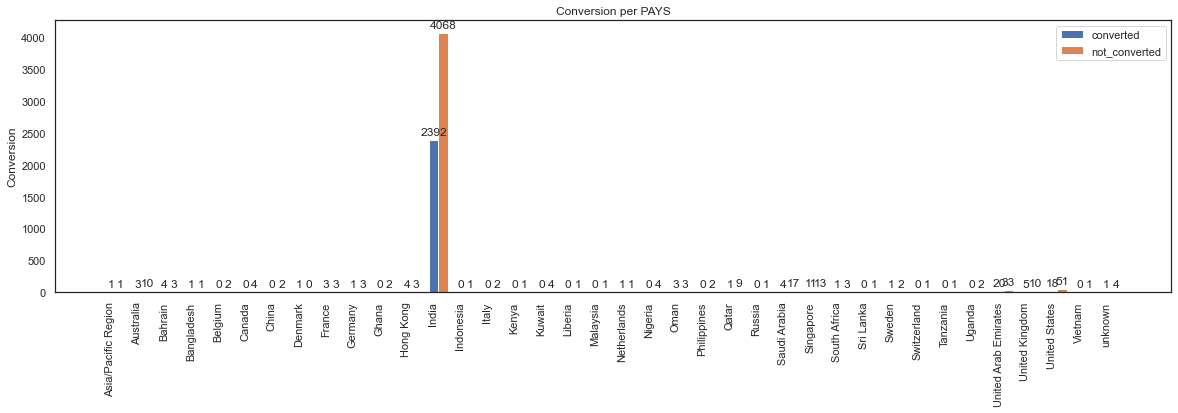

<Figure size 3600x3600 with 0 Axes>

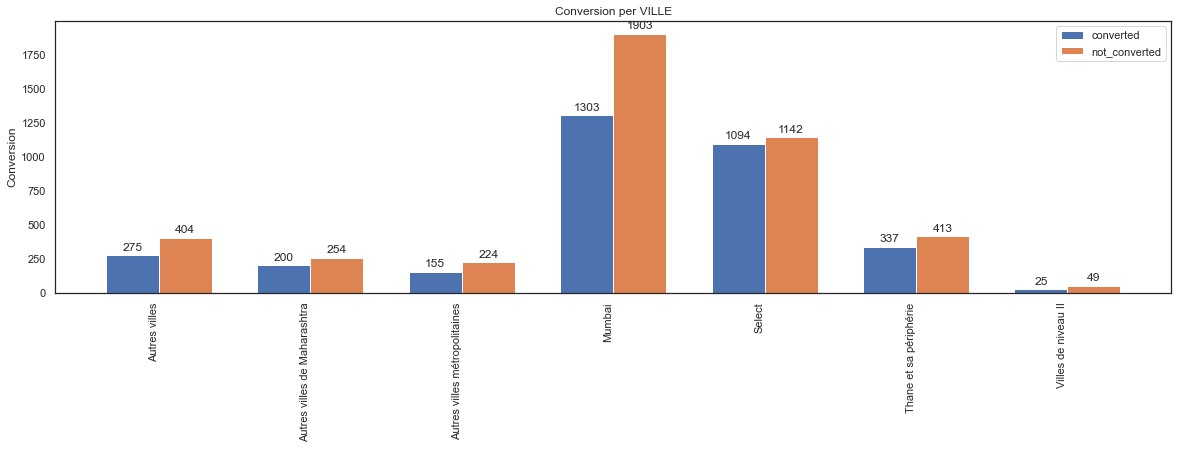

<Figure size 3600x3600 with 0 Axes>

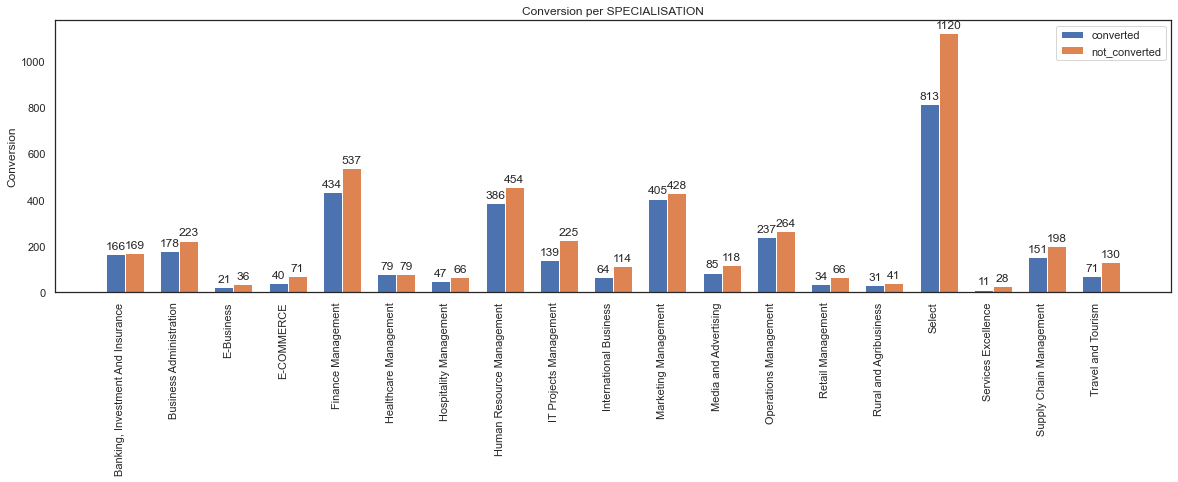

<Figure size 3600x3600 with 0 Axes>

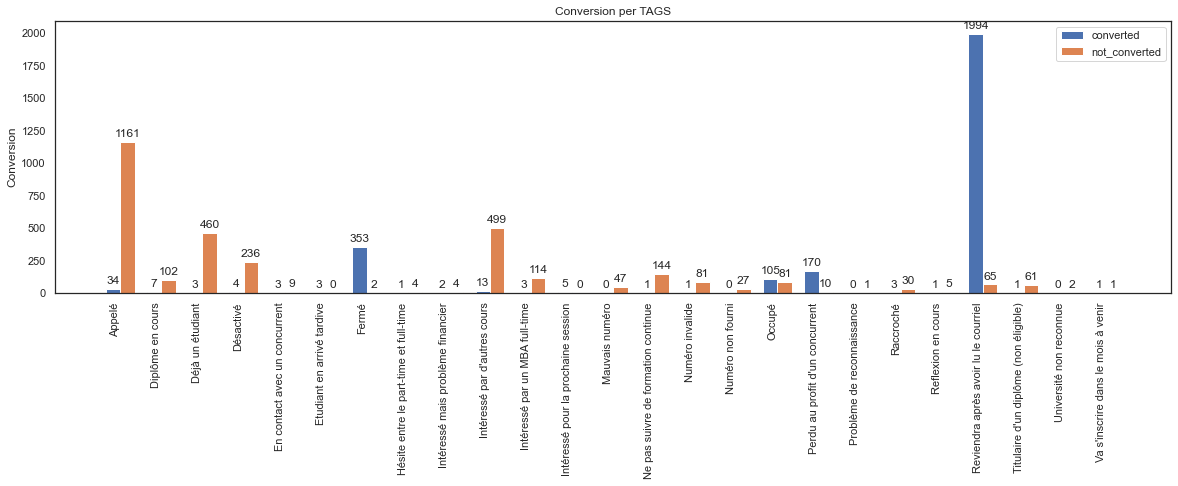

<Figure size 3600x3600 with 0 Axes>

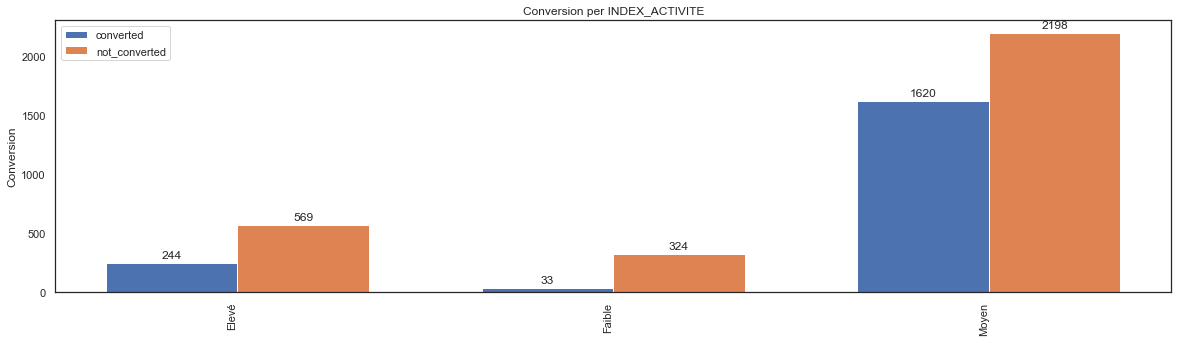

<Figure size 3600x3600 with 0 Axes>

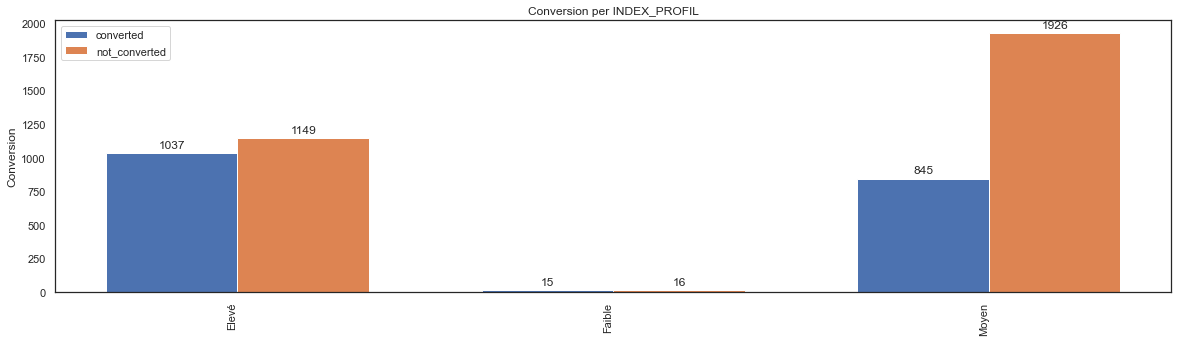

<Figure size 3600x3600 with 0 Axes>

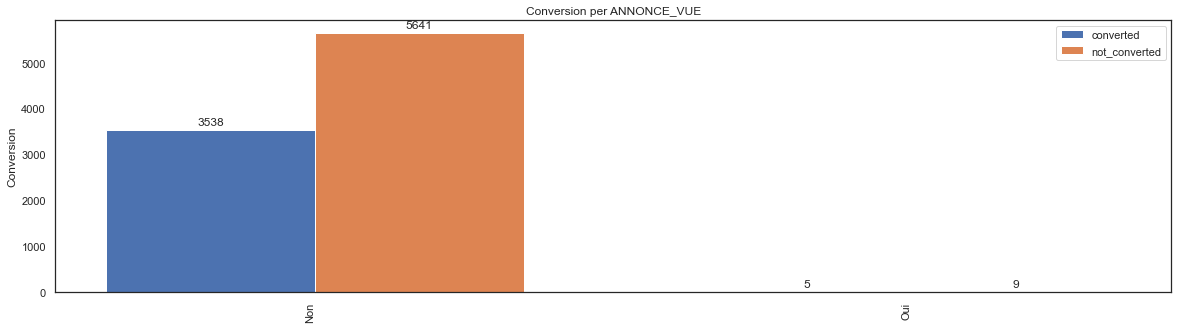

<Figure size 3600x3600 with 0 Axes>

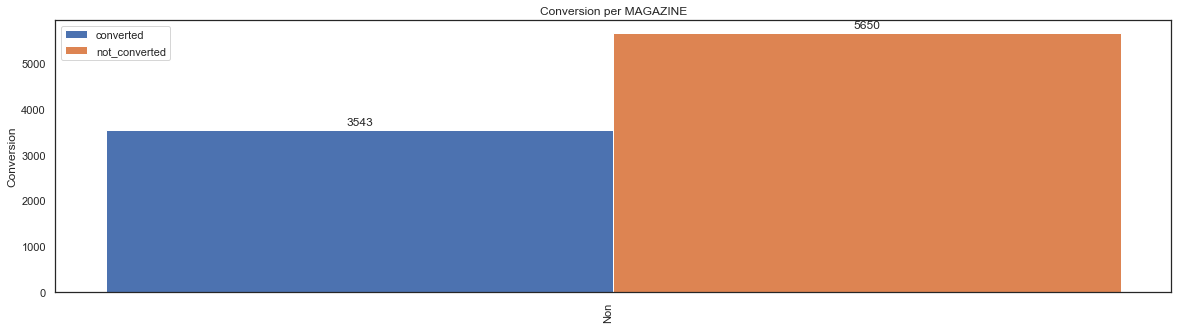

<Figure size 3600x3600 with 0 Axes>

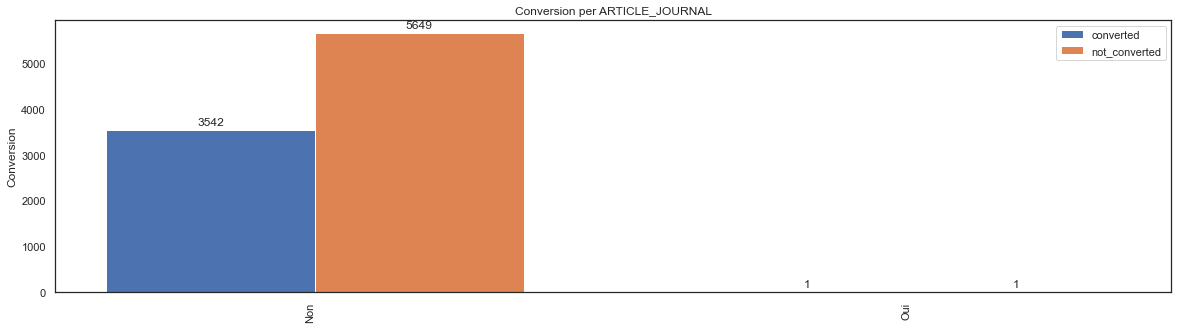

<Figure size 3600x3600 with 0 Axes>

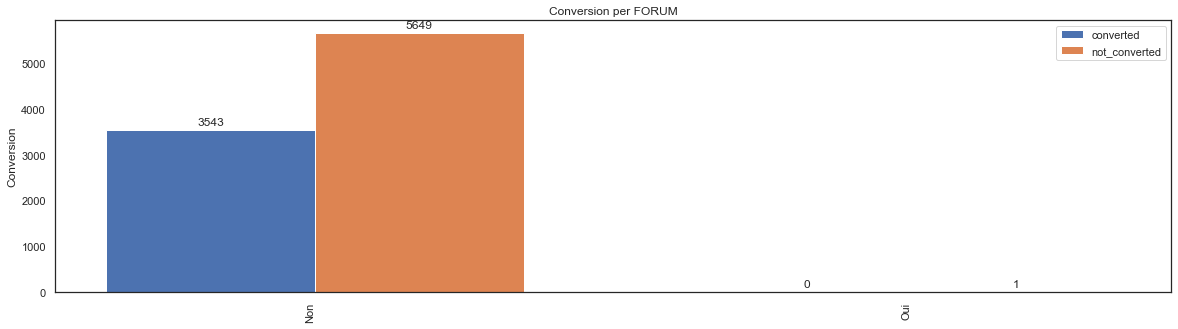

<Figure size 3600x3600 with 0 Axes>

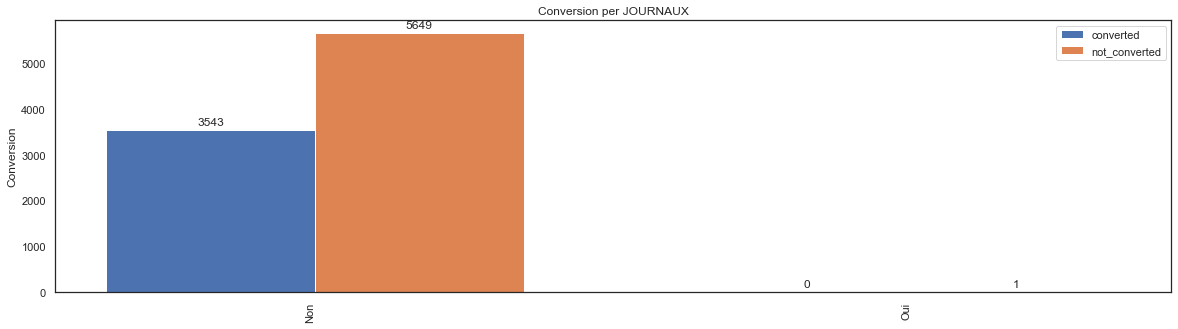

<Figure size 3600x3600 with 0 Axes>

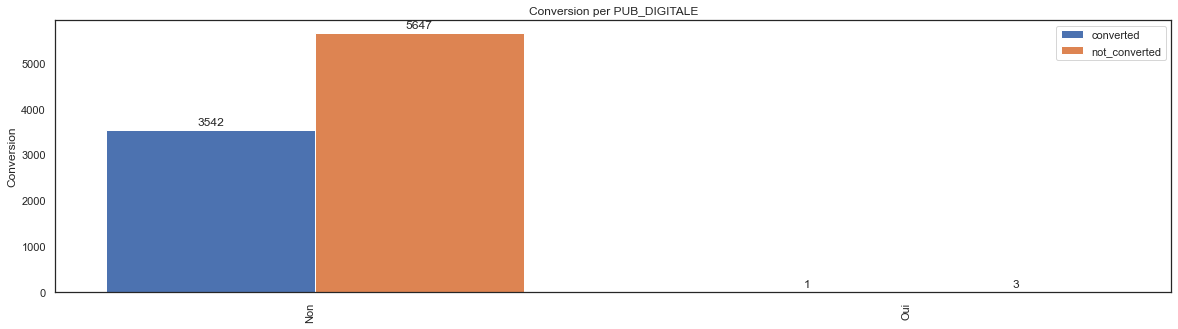

<Figure size 3600x3600 with 0 Axes>

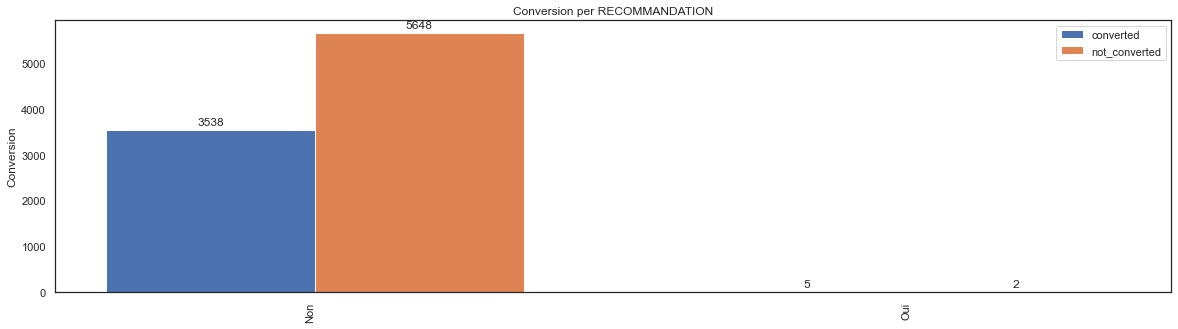

<Figure size 3600x3600 with 0 Axes>

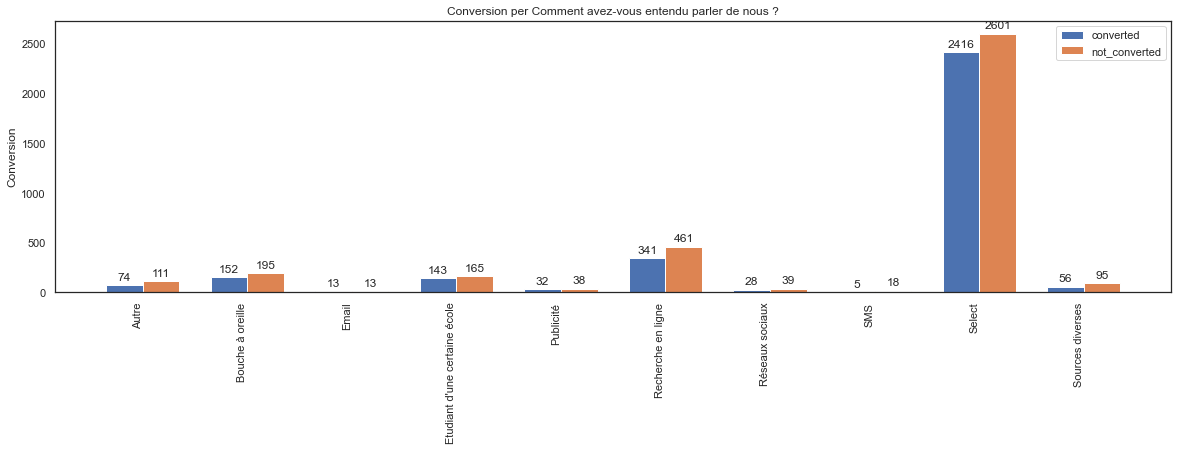

<Figure size 3600x3600 with 0 Axes>

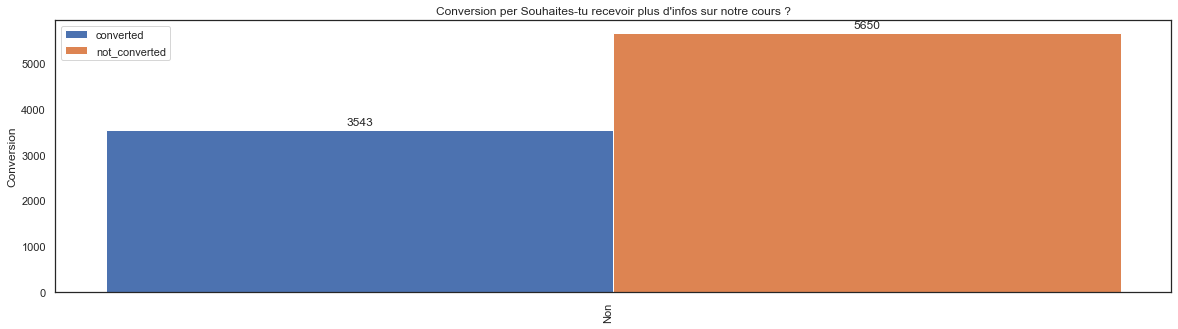

<Figure size 3600x3600 with 0 Axes>

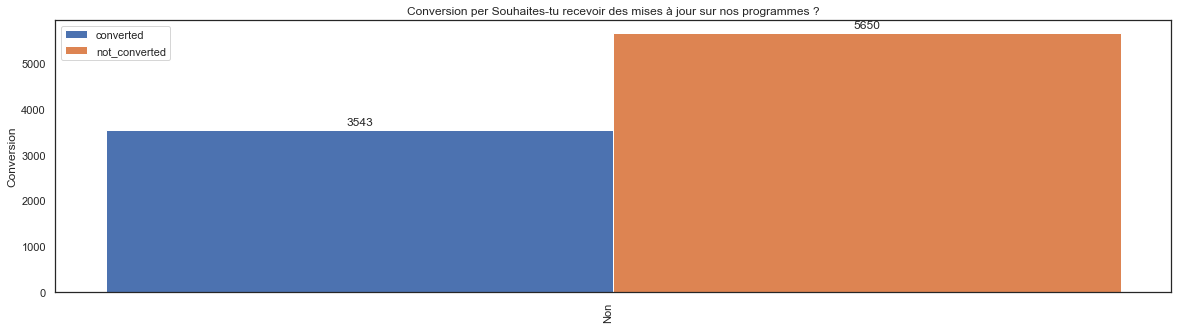

<Figure size 3600x3600 with 0 Axes>

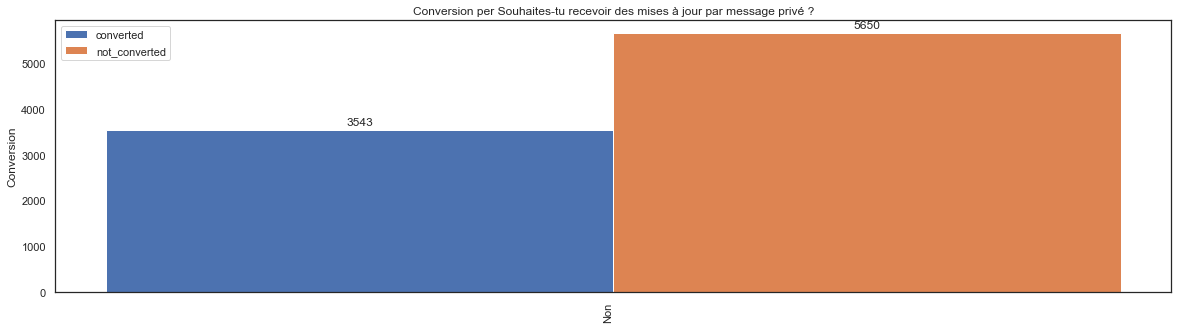

<Figure size 3600x3600 with 0 Axes>

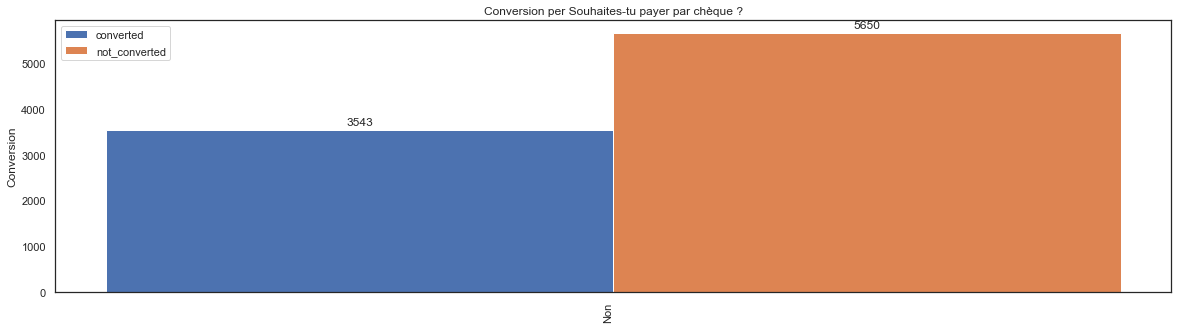

<Figure size 3600x3600 with 0 Axes>

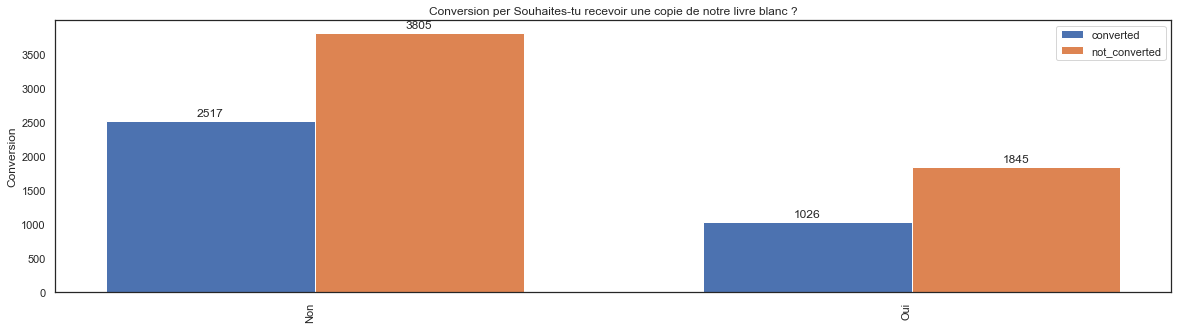

<Figure size 3600x3600 with 0 Axes>

In [67]:
for var in cat_vars:
    _plot(col=var, title='Conversion per '+var)

In [71]:
data[['PAYS', 'CONVERTI']]

,PAYS,CONVERTI
0,NaN,0
1,India,0
2,India,0
3,NaN,1
4,India,0
...,...,...
9188,NaN,0
9189,India,1
9190,India,0
9191,India,1
